# 番外篇：寻找方程的根

在上一章里我们第一次接触了所谓”迭代“的方法，这里我们将顺势介绍类似的迭代方法在寻找方程的根的应用

问题：寻找方程$f(x)=0$的根。

假设我们能够知道$f'(x)$的解析形式，那么问题就会变得相对简单。

我们可以假设那个未知的根在$x^*$处，从而满足$f(x^*)=0$。而$x_i$是一个对$x^*$的估计。
我们考虑以下这种递推（迭代）关系：
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)},
$$
并期待每一次迭代，都可以使$x_i$更加靠近$x^*$，从而可以找到更好的解。这是为什么？

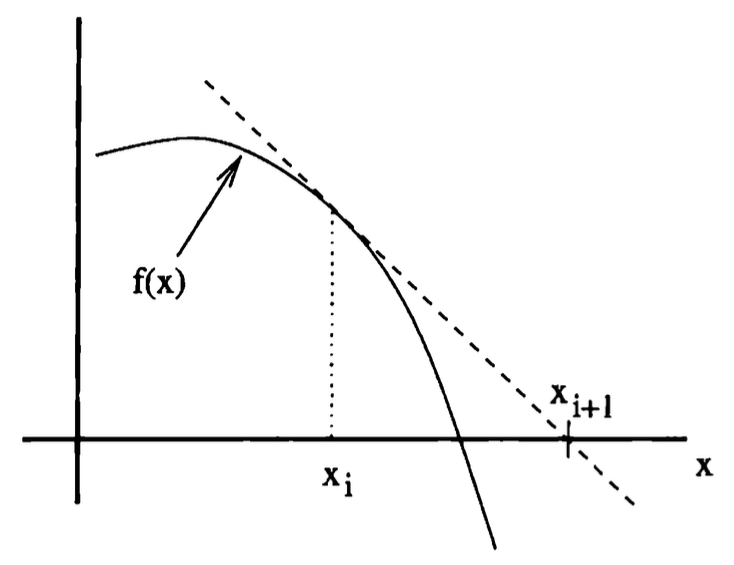

从这张图片可以看出$x_{i+1}$其实是函数$f$在$x_i$点上的切线和$x$轴的交点（自行推导证明）！而如果我们不断重复这个操作，会发现我们会越来越靠近$x^*$点。

我们称这种迭代方法叫做**牛顿迭代法**。

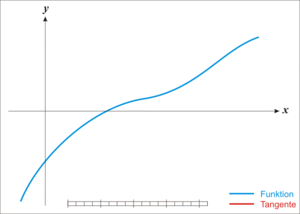

牛顿迭代法的有效性也可以用泰勒展开来简单解释。令$\Delta x_i = x_i - x^*$，我们可以做下面的展开：

$$
f(x^*) = f(x_i) - f'(x_i)\Delta x_i + \mathcal{O}(\Delta x_i^2) \equiv 0
$$

同理，我们也有
$$
f(x_{i+1}) - f'(x_{i+1})\Delta x_{i+1} + \mathcal{O}(\Delta x_{i+1}^2) \equiv 0
$$

结合牛顿迭代公式$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$,
可以得到：
$$ 
\Delta x_{i+1} = \Delta x_i - \frac{f(x_i)}{f'(x_i)}
$$

进一步泰勒展开，我们可得

$$
\begin{eqnarray}
\Delta x_{i+1} &=& \Delta x_i - \frac{f(x^* + \Delta x_i)}{f'(x_i + \Delta x_i)} \\
&\approx& \Delta x_i - \frac{\Delta x_i f' + \frac12 (\Delta x_i)^2 f''}{f' + \Delta x_i f''}
\end{eqnarray}
$$

通分得：
$$
\Delta x_{i+1} \approx \frac{\frac12 (\Delta x_i)^2  f''}{f'+\Delta x_i f''} \approx \left(\frac{f''}{2f'}\right)\Delta x_i^2
$$

这个近似公式意味着，当我们当前的$\Delta x_i$比较小，即当前的解十分接近$x^*$时，每迭代一步都会使得和$x^*$的差进一步减小。而如果当前的$\Delta x_i$比较大，或者函数比较“平”（$f'$比较小), 那么牛顿迭代法可能会需要比较久的时间才能得到结果。

**另一个重要的问题是：如果有时我们并不知道$f'(x)$的解析形式，我们该如何寻找方程的根呢？**

我们可以使用这样的公式对$f'(x)$进行估计
$$
f'(x_i) = \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}
$$

带入该表达式到牛顿迭代的方程中，我们可以得到这样的迭代方式：
$$
x_{i+1} = x_i - \frac{f(x_i) (x_i - x_{i-1})}{f(x_i) - f(x_{i-1})}
$$

当然，为了让迭代不断进行下去，这样的迭代需要两个不同的初始$x_i$而不是一个！

### 高维问题的牛顿迭代

$$
\begin{pmatrix}
f_1(x_1, \cdots , x_n)  \\
f_2(x_1, \cdots , x_n)  \\
\vdots \\
f_n(x_1, \cdots , x_n) \\
\end{pmatrix}
=\vec{f}(\vec{x}) = 0
$$

我们需要依赖雅可比矩阵（Jacobian）来进行牛顿迭代。
雅可比矩阵：
$$
J = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} && \frac{\partial f_1}{\partial x_2} && \cdots \\
\frac{\partial f_2}{\partial x_1} && \frac{\partial f_2}{\partial x_2} && \cdots \\
\vdots && \cdots && \ddots \\
\end{pmatrix}
$$

牛顿迭代可以写成：
$$
\vec{x}_{i+1} = \vec{x}_{i} - J^{-1}(\vec{x}) \vec{f}(\vec{x})
$$

### 牛顿迭代也会失败。。。吗？

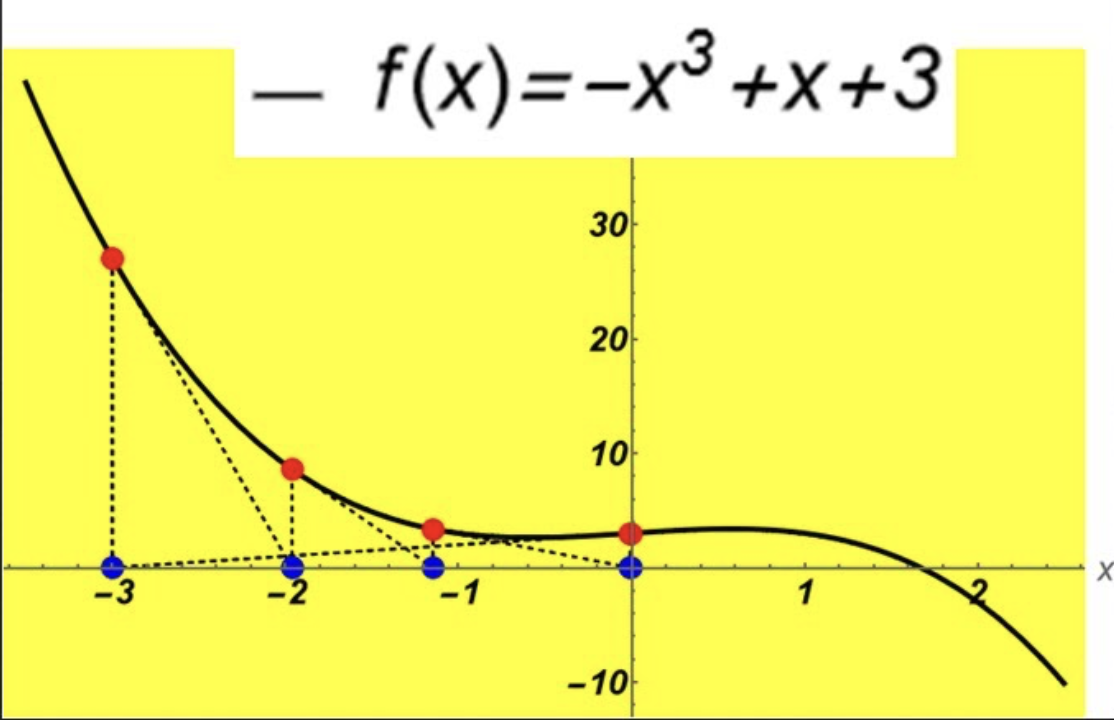

如图所示。

### 二分法寻找方程的根

那么，有没有一种100%能够找到方程根的方法呢？

其实在某些情况下，我们能够100%确信方程的根存在。例如：对于两个点$x_l$和$x_r$，如果$f(x_l) \cdot f(x_r) < 0$, 那么一定有至少一个方程的根在区间$(x_l, x_r)$中。而我们可以通过所谓的二分法，来寻找方程的根。

我们还是给出下面这个范例程序，来寻找$f(x) = - x^3 + x + 3$在$(1,2)$之间的根。

In [2]:
import numpy as np
# 二分法寻找方程的根
def f(x):
    return -x**3 + x + 3

def bisection(l, r, tar_prec):
    prec = 1e10
    if(f(l) * f(r) > 0):
        print('错误，f在l和r处同号！')
        return -1
    if( l > r):
        print('l大于r')
        return -1
        
    while(prec > tar_prec):
        mid = (l + r) / 2
        print(l, r, mid)
        if f(mid) * f(l) > 0:
            l = mid
        else:
            r = mid
        prec = np.abs(f(mid))
    return mid

In [3]:
bisection(1,2,1e-3)

1 2 1.5
1.5 2 1.75
1.5 1.75 1.625
1.625 1.75 1.6875
1.625 1.6875 1.65625
1.65625 1.6875 1.671875
1.65625 1.671875 1.6640625
1.6640625 1.671875 1.66796875
1.66796875 1.671875 1.669921875
1.669921875 1.671875 1.6708984375
1.6708984375 1.671875 1.67138671875
1.67138671875 1.671875 1.671630859375


1.671630859375

其实，类似的二分的算法也可以用来寻找极大值或者极小值。比如，刚才的函数$f(x) = - x^3 + x + 3$在$1/\sqrt{3}$处有一个极大值，让我们来试着寻找它。
我们的思想是，对于$x_l$和$x_r$，如果有任何一下$x_m$满足$f(x_l) < f(x_m)$且$f(x_m) > f(x_r)$，那么一定存在一个极大值。

In [4]:
def f(x):
    return -x**3 + x + 3
def bisection_for_max(xl, xr, xm, tar_prec):
    prec = 1e10
    if (f(xm) > f(xl) and f(xm) > f(xr) ) == False:
        print('不满足条件f(xl) < f(xm) 且f(xm) > f(xr)')
        return -1
    find_r = True
    while(prec > tar_prec):
        if (find_r == True):
            # 尝试右边区间
            xm_new = (xr + xm) / 2
            # 如果极大值条件得到满足, 说明尝试右边是对的
            if f(xm_new) > f(xm) and f(xm_new) > f(xr): 
                xl = xm
                xm = xm_new
            else:
                #尝试右边“可能”不对
                xr = xm_new
                find_r = False
        else:
            # 尝试左边区间
            xm_new = (xl + xm) / 2
            # 如果极大值条件得到满足, 说明尝试左边是对的
            if f(xm_new) > f(xm) and f(xm_new) > f(xl): 
                xr = xm
                xm = xm_new
            else:
                #尝试左边“可能”不对
                xl = xm_new
                find_r = True
        prec = xr - xl
        #print(xm_new, xl, xr)
    return ((xr + xl) / 2, f((xr + xl) / 2))

In [5]:
bisection_for_max(0, 1,0.5, 1e-3)

(0.5771484375, 3.384900108911097)

可见我们成功的找到了最大值。

#### 总结

我们在这里介绍了两种求方程根的方法。

##### 牛顿迭代法
- 优点
  1. 简单，速度快
  2. 非常容易扩展到多元方程
- 缺点
  1. 收敛性不能够保证


##### 二分法
- 优点
  1. 简单，速度快
  2. 满足一定条件时的收敛性一定可以保证
- 缺点
  1. 需要满足特定条件
  2. 扩展到多元方程相对困难


# 6. 波

在这一章里，我们将展示如何通过数值计算的方式对波进行分析

## 6.1 理想情况下的波

我们都学习过波动方程：
$$
\frac{\partial^2 y }{\partial t^2} = v^2 \frac{\partial^2 y}{\partial x^2}
$$

波动方程在多种物理理论中都可能会出现（回忆一下）。$v$一般来说代表波速。

为了对波动方程进行求解，我们需要同时对$x$和$t$方向进行离散化处理。我们令$y(i, n)$表示$y(x=i\Delta x, t=n\Delta t)$。

还记得我们之前得到过的二阶导数的离散化求解公式吗？
$$
\frac{\partial^2 V}{\partial x^2} \approx  \frac{V(i+1, j, k) + V(i-1, j, k) - 2V(i, j,k)}{\Delta x^2} 
$$


对于我们现在要处理的函数y(x, t)，该公式同样适用，带入之后我们可以得到

$$
\frac{y(i,n+1) + y(i, n-1) - 2 y(i, n)}{\Delta t^2} \approx v^2 \frac{y(i+1,n) + y(i-1,n) - 2 y(i, n)}{\Delta x^2}
$$

整理可得到：
$$
y(i, n+1) = 2\left[1 - \left(\frac{v \Delta t}{\Delta x}\right)^2\right] y(i, n) - y(i, n-1) + \left(\frac{v \Delta t}{\Delta x}\right)^2 [y(i+1, n ) + y(i-1, n)]
$$

从微分方程的性质来说，我们需要两个初始条件，一般来说是$y(x, t=0)$和$dy(x, t=0)/dt$。但是从这个离散化的形式可以看出，只要知道在$y(i, n=0)$和$y(i, n=0)$时的值，也足够我们通过递推关系对方程进行求解。

另外，我们也需要考虑空间上的边界条件。跟我们在求解拉普拉斯方程中所遇到的问题一样，这样的递推关系无法应用于空间边界上的格子（想想为什么）。因此，我们也需要在应用递推关系的同时施加空间上的边界条件。

而边界条件的选取依赖于我们要考虑怎样的物理过程。对于一个物理的弦，一个常见的边界条件的选取可以是弦两端固定（y=0）。

我们因此可以来实现这种递推关系

In [73]:
def prop_waves(y0, y1, r, n):
    N = len(y0)
    y2 = np.zeros(y0.shape)
    while(n > 0):
        for i in range(1, N-1):
            y2[i] = 2 * (1 - r**2) * y1[i] - y0[i] + r**2 * (y1[i+1] + y1[i-1])

        y0 = y1.copy()
        y1 = y2.copy()
        n = n-1
    return y2

假如波速$300m/s$, $\Delta x = 0.001 m$, $\Delta t = \Delta x / v$。 定义$r\equiv \frac{v \Delta t}{\Delta x}$，所以$r = 1$。弦的长度也暂时固定为$1m$

我们选取初始的$y_0$满足$y_0=\exp [-k(x-x)^2]$

In [351]:
# 创造在x轴上的格点
xs = np.linspace(0, 1, 1000)

y0 = np.exp(-1000 * (xs - 0.5)**2)

我们拿出我们之前用到过的画图函数

In [8]:
import matplotlib.pyplot as plt

def curve_plot(xs, ys, xlabel='x', ylabel='y', legends=None, islog=False, 
               xlim=None, ylim=None, scatter=False, figsize=(10,2)):

    if isinstance(xs, np.ndarray):
        xs = [xs]
    if isinstance(ys, np.ndarray):
        ys = [ys]
    
    # 调整图片的大小
    plt.figure(figsize=figsize)
    
    # 画出轨迹
    for x, y in zip(xs, ys):
        if(scatter == False):
            plt.plot(x, y)
        else:
            plt.scatter(x,y)
    
    # 加入x轴标记
    plt.xlabel(xlabel, fontsize=24)
    # 加入y轴标记
    plt.ylabel(ylabel, fontsize=24)

    if(legends != None):
        plt.legend(legends, fontsize=24)
    if(xlim != None):
        plt.xlim(xlim)
    if(ylim != None):
        plt.ylim(ylim)
    if(islog == True):
        plt.yscale('log')
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()

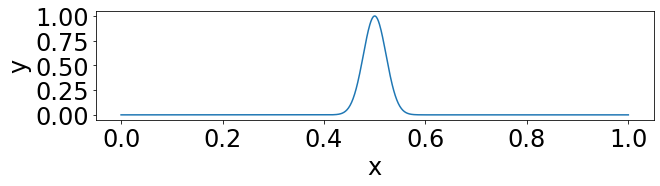

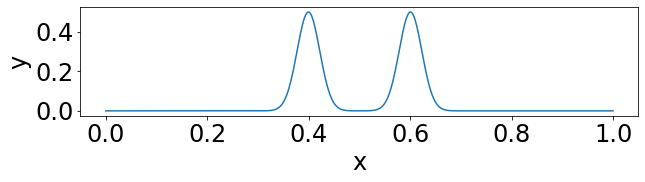

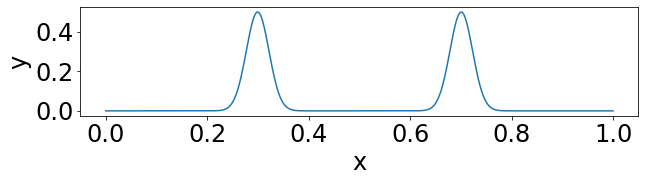

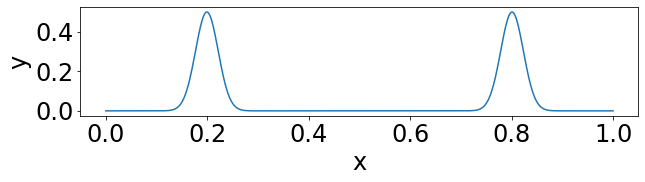

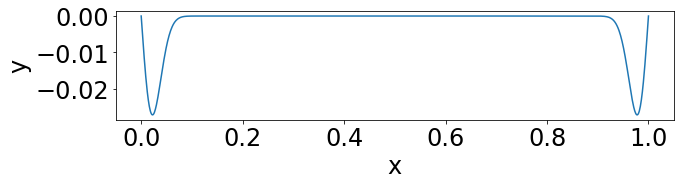

In [214]:
curve_plot(xs, prop_waves(y0, y0, 1, 1))
curve_plot(xs, prop_waves(y0, y0, 1, 100))
curve_plot(xs, prop_waves(y0, y0, 1, 200))
curve_plot(xs, prop_waves(y0, y0, 1, 300))
curve_plot(xs, prop_waves(y0, y0, 1, 500))


初始的波包在形成之后分为两只（想想为什么）。而我们边界条件的选取，会造成波在边界上的翻转反射现象。

注意，我们在这里让$r\equiv \frac{v \Delta t}{\Delta x}=1$，这是一个相当特殊的选取，因为这意味着在递推关系中的某些项的消失。我们来试试让$r=2$。

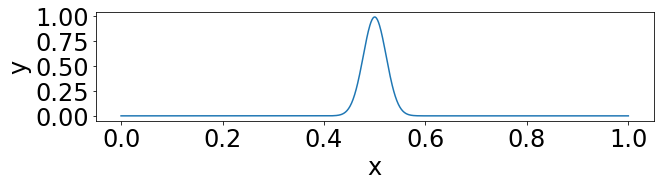

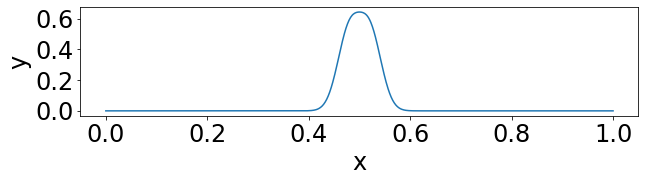

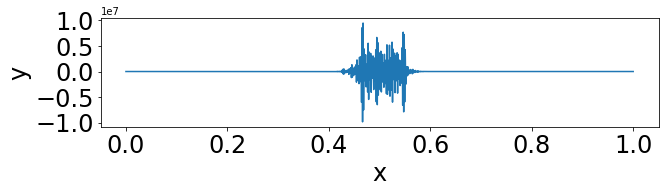

In [10]:
curve_plot(xs, prop_waves(y0, y0, 2, 1))
curve_plot(xs, prop_waves(y0, y0, 2, 10))
curve_plot(xs, prop_waves(y0, y0, 2, 20))

程序迅速失去了稳定性，变的一团糟。而如果让r小于1，程序还会依然稳定的求解。

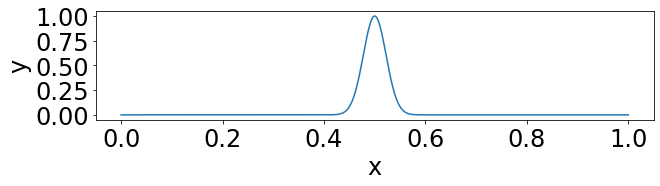

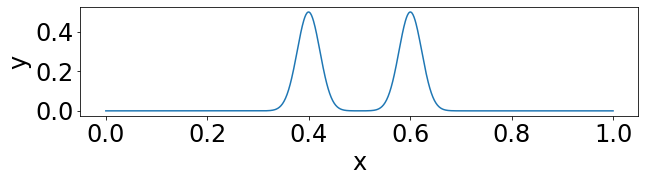

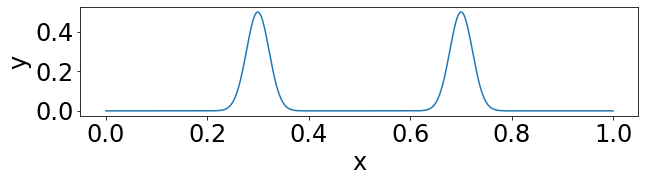

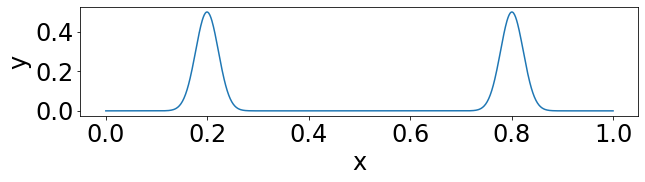

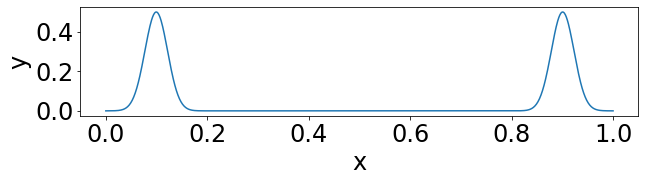

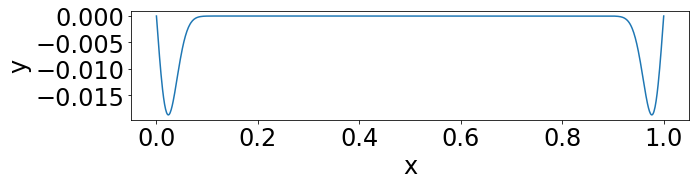

In [11]:
curve_plot(xs, prop_waves(y0, y0, 0.5, 1))
curve_plot(xs, prop_waves(y0, y0, 0.5, 200))
curve_plot(xs, prop_waves(y0, y0, 0.5, 400))
curve_plot(xs, prop_waves(y0, y0, 0.5, 600))
curve_plot(xs, prop_waves(y0, y0, 0.5, 800))
curve_plot(xs, prop_waves(y0, y0, 0.5, 1000))

可见，在波动方程的成功的数值求解中，$r\equiv \frac{v \Delta t}{\Delta x}<=1$, 是一个必要条件。这也等价的意味着$\Delta t < \Delta x / c$。

事实上，这个条件具有相当大的普适性。几乎在任何同时涉及到时间积分和空间求导的系统中，我们都会要求$r <= 1$，对于这个简单系统，$r=1$也是稳定的（甚至具有最好的数值稳定性），但对于其他更复杂的系统，往往需要令$r<1$。

而$r$一般也被称为Courant–Friedrichs–Lewy 系数，简称CFL系数。

## 6.2 弦振动与谱分析

如果我们对刚才讨论的机械波引起的弦上某个具体的质点的振动感兴趣，我们也可以稍微修改我们之前的程序，用来记录左端某个点`sn`的振动

In [349]:
# sn给出了想要记录振动的某个点的下标
def prop_waves_v2(y0, y1, r, n, sn):
    N = len(y0)
    y2 = np.zeros(y0.shape)

    # 储存某个点的振动历史
    vb = []
    while(n > 0):
        for i in range(1, N-1):
            y2[i] = 2 * (1 - r**2) * y1[i] - y0[i] + r**2 * (y1[i+1] + y1[i-1])

        y0 = y1.copy()
        y1 = y2.copy()
        vb.append(y2[sn])
        n = n-1
    return y2, np.array(vb)

In [352]:
ys, vb = prop_waves_v2(y0, y0, r=1, n=10000,sn=50)

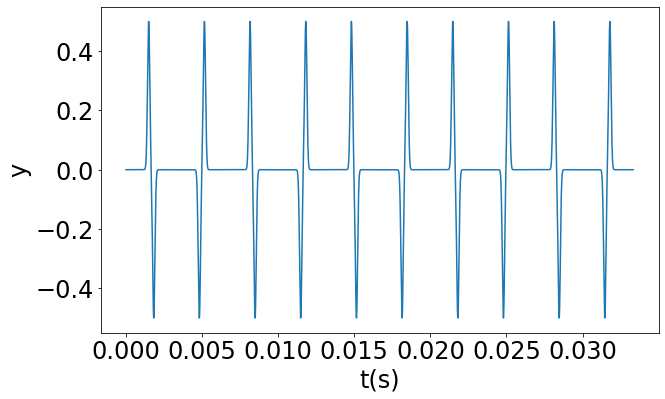

In [353]:
curve_plot(np.arange(10000) * 0.001/300, vb, figsize=(10,6), xlabel='t(s)', ylabel='y')

这种上下震荡的模式对应了波在端点（边界）处的反射。而这个看起来简单的冲击震荡的运动方式，其实隐藏了很多信息。

而分析这些信息，最方便的是使用谱分析的方法。下面，我们将转而介绍我们如何对这种没有解析形式的函数进行傅立叶分析。

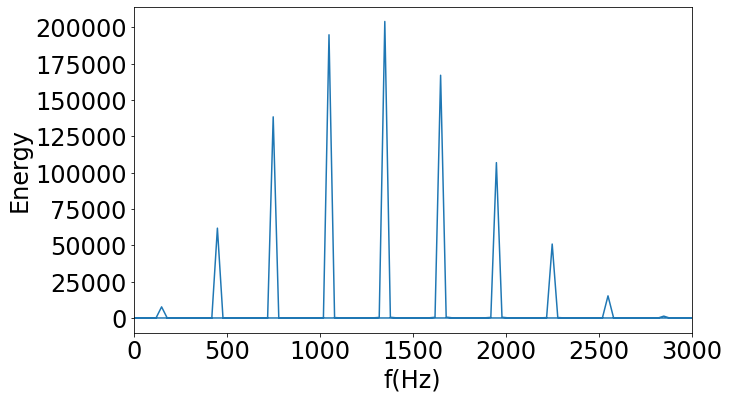

In [354]:
V = np.fft.fft(vb)
PV = np.abs(V)**2
freqs = np.fft.fftfreq(n=10000, d=0.001/300)
curve_plot(freqs, PV, figsize=(10,6), xlabel='f(Hz)', ylabel='Energy', xlim=[0,3000])

让我们输出这些能量集中的点所对应的频率

In [16]:
freqs[PV > 1000]

array([  150.,   450.,   750.,  1050.,  1350.,  1650.,  1950.,  2250.,
        2550.,  2850.,  3450.,  3750.,  4050.,  4350.,  4650.,  4950.,
       -4950., -4650., -4350., -4050., -3750., -3450., -2850., -2550.,
       -2250., -1950., -1650., -1350., -1050.,  -750.,  -450.,  -150.])

回忆一下驻波的频率，基频: $v / 2L \approx 150 Hz$! 可见弦上质点的振动模式是由基频的奇数倍的频率所构成的，这种现象该如何解释？

> 为了回答这个问题，我们需要换一个角度，以“谱”的角度，重新去理解波动方程，进而引入了一种新的，高效求解波动方程的方法：谱方法 （spectral method）。

## 番外篇2：离散傅立叶变换（DFT）

对于一个已经离散化的函数$y(t=n \Delta t) $, $n=0,1,2...N-1$。离散傅立叶变换（discrete Fourier transform）的定义如下

$$
Y_k = \sum_{n=0}^{N-1} y_n e^{-2\pi j k n / N}
$$

而反变换为：
$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k e^{2\pi j n k / N}
$$

由DFT的表达式，可以知道，（一维的）DFT把一个一维数组（可以是实数或复数数组），转换成一个同样大小的复数数组。

实数的DFT有以下这些特点：
- 如果$y_n$都为实数，$Y_k$满足$Y_{N-n} = Y_n^*$（互为复共轭）
- $Y_k$的下标$k$代表的波具有频率$f_k=k/(N\Delta t)$
- 结合以上2条性质，DFT能够代表的最高频率$f_{k,max} = 1 / (2\Delta t)$

DFT的优点显而易见。对一个有限长的数组，其非常适合在计算机中实现。

但是，如果直接简单的实现这种DFT的求和公式，是一个$\mathcal{O}(N^2)$的算法。好在，存在一个非常经典，非常实用的加速DFT的算法，叫做快速傅立叶变换（FFT）。

它能够以$\mathcal{O}(N \log N)$的计算效率，精确的进行DFT和反DFT。而FFT的计算，可以由`NumPy`的`fft`子模块实现，下面让我们来看一些例子：

#### 例1 三角函数

让我们首先来看一下一个`sin`函数的DFT是什么样子

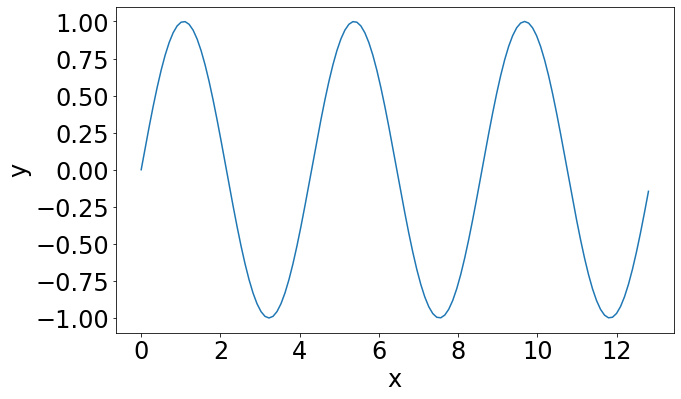

In [17]:
N = 128
T = 12.8
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

freq = 1 / 4.3 # 周期4.3s， 频率0.23

y = np.sin(2 * np.pi * freq * t)

curve_plot(t, y, figsize=(10,6))

In [18]:
# 调用NumPy的fft函数
Y = np.fft.fft(y)
# 输出fft之后的Y的大小和类型
print(Y.shape, Y.dtype)

(128,) complex128


可见`Y`是一个大小同样为128的`complex`数组。


我们暂时先不考虑$Y$的下标代表的物理意义（其实是频率），而直接分别把其实部和虚部画出来：



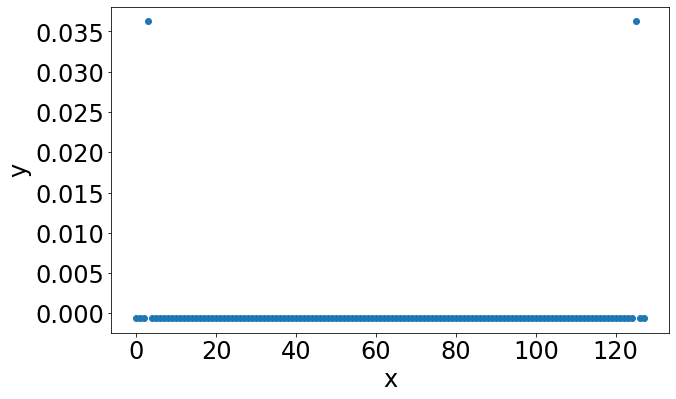

In [19]:
#绘制Y的实部
curve_plot(np.arange(N), Y.real, scatter=True, figsize=(10,6))

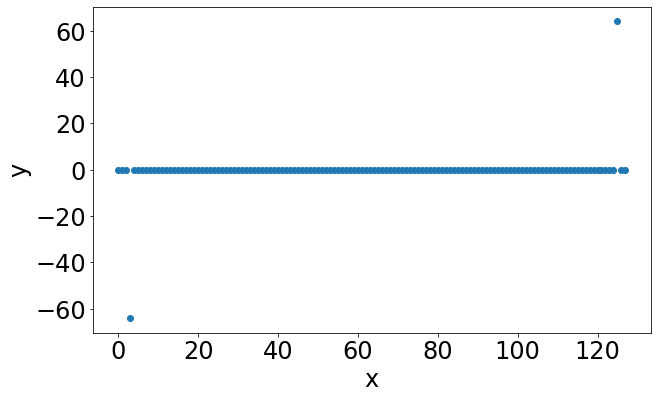

In [20]:
#绘制Y的虚部
curve_plot(np.arange(N), Y.imag, scatter=True, figsize=(10,6))

对比函数$\sin(\omega_1 t)$的傅立叶变换：$j\pi [\delta(\omega + \omega_1) - \delta(\omega - \omega_1)]$，
是一个纯虚的函数，而DTF显然具有非0的实部。这是由于计算误差导致（可以增大N）来验证。

先暂时只对比虚部，我们可以发现，左右两个非0处所对应的下标的物理意义，应该分别是正的和负的角频率$\omega_1$。

所以，DFT在计算中，我们对`Y`的下标`k`（$k=0-N-1$）对应的频率做类似的规定：

- 当$k < N/2$，有$f_k = k / T$
- 当$k >= N/2$, 有$f_k = - (N - k) / T$

可以简单的用`NumPy`计算：

In [21]:
# 计算fft下标对应的频率
freqs = np.concatenate([np.arange(N/2) / T,  -np.arange(1, N/2+1)[::-1] / T]) 

有了对频率的定义之后，我们可以在傅立叶变换之后的给予$Y_k$的下标以物理意义$f_k$。

下面让我们改变`x`轴的物理意义之后，重新绘制DFT之后的实部和虚部

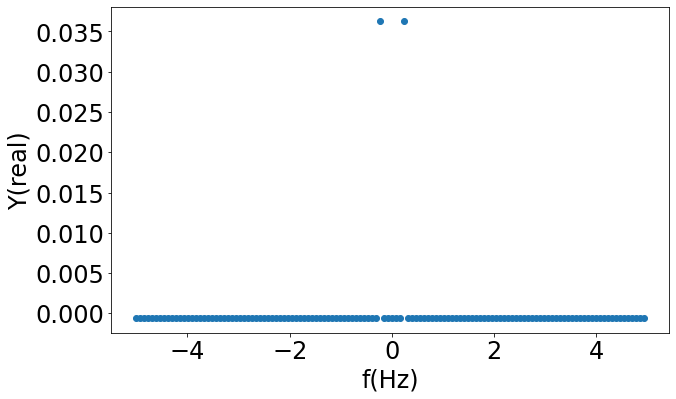

In [22]:
#绘制Y的实部, 把x轴替换成freqs
curve_plot(freqs, Y.real, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(real)')

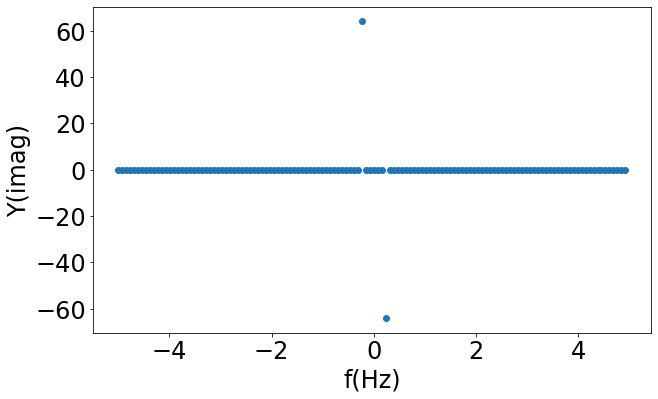

In [23]:
#绘制Y的虚部
curve_plot(freqs, Y.imag, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(imag)')

我们可以输出这两个虚部比较大的点所对应的频率:

In [24]:
print(freqs[Y.imag > 10])

[-0.234375]


再对比一下我们原始使用的频率$1/4.3s$, 是一致的！

> 当然，我们可能会觉得计算下标`k`所对应的程序有点复杂，容易出错。所以`NumPy`其实提供了函数帮助我们做到这一点

In [25]:
# 用NumPy计算fft下标对应的频率
# 第一个参数是N, 第二个参数对应的dt或者dx
freqs2 = np.fft.fftfreq(n=N, d=T/N)

这两种方法计算出的频率是相等的！

让我们尝试研究一下更复杂一点的函数的DFT，比如`sin`和`cos`的叠加：

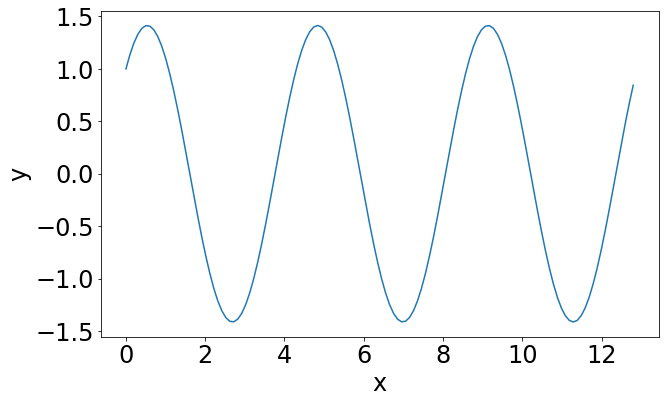

In [26]:
N = 128
T = 12.8
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

freq = 1 / 4.3 # 周期4.3s， 频率0.23

y = np.sin(2 * np.pi * freq * t) + np.cos(2 * np.pi * freq * t)

curve_plot(t, y, figsize=(10,6))

计算它对应的DFT:

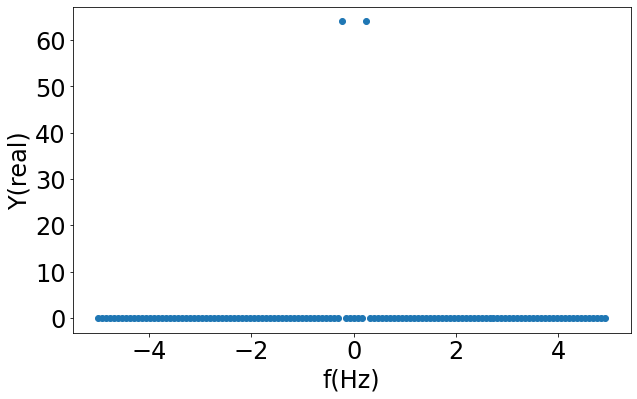

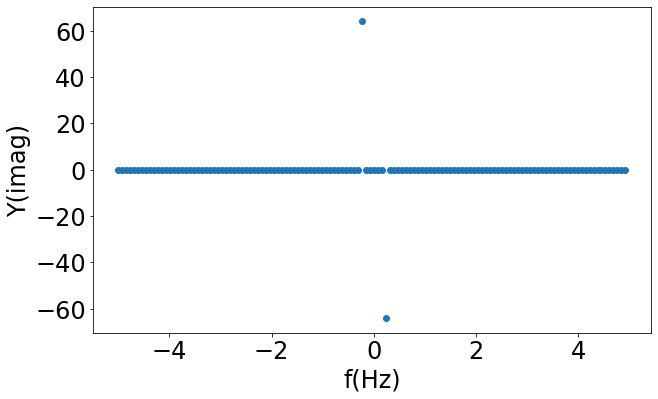

In [27]:
Y = np.fft.fft(y)
curve_plot(freqs, Y.real, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(real)')
curve_plot(freqs, Y.imag, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(imag)')

我们会发现，这次不仅有非零的实部，也有非0的虚部了！（类比傅立叶变换给予我们的结果，思考是为什么）

同样的，我们也可以使用`NumPy`,非常简单的进行反变换：


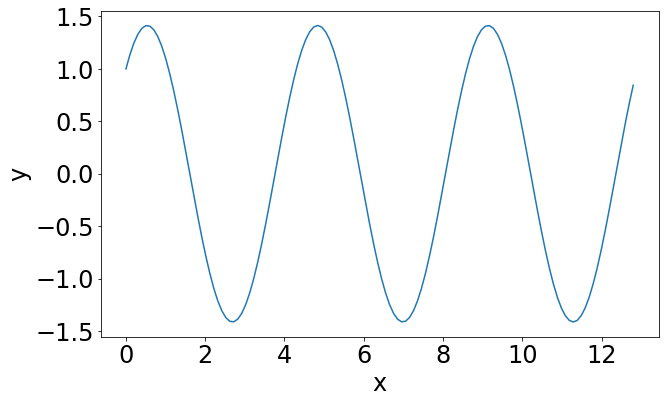

In [28]:
# 逆DFT 

curve_plot(t, np.fft.ifft(Y).real, figsize=(10,6))

另外，需要注意的是，我们之前通过DFT得到的结果，之所以和传统的傅立叶变换得到的结果，可以几乎完美的对照，是因为我们在对原始函数取样时，正好覆盖了几个完整的周期。

如果我们的取样没有那么完美（通过改变`T`的值，使得其不再是周期的倍数）：

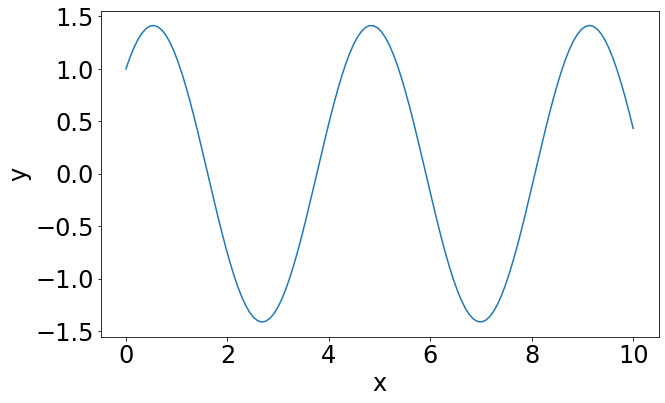

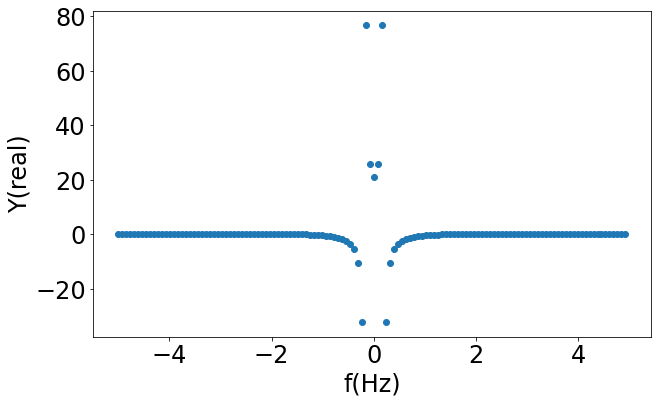

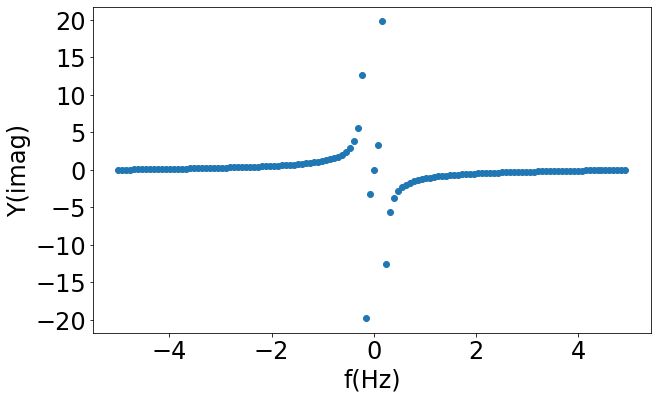

In [29]:
N = 128

# T 不再是周期的倍数
T = 10
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

freq = 1 / 4.3 # 周期4.3s， 频率0.23

y = np.sin(2 * np.pi * freq * t) + np.cos(2 * np.pi * freq * t)

curve_plot(t, y, figsize=(10,6))

Y = np.fft.fft(y)
curve_plot(freqs, Y.real, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(real)')
curve_plot(freqs, Y.imag, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(imag)')

那么DFT的结果就不再能够完美的与傅立叶变换的结果对应！但总体上，如果我们取的周期足够的多，DFT的结果还是能够近似的反映频率的信息！

#### 例2 帕塞瓦尔定理（Parseval's theorem）与功率谱

对于傅立叶变换，有帕塞瓦尔定理这样一个非常重要的定理：

$$
\int |y(t)|^2 dt = \frac{1}{2\pi} \int |F(\omega)|^2 d\omega
$$

对于DFT，我们也有离散版本的帕塞瓦尔定理:

$$
\sum_{n=0}^{N-1} |y_n|^2 = \frac{1}{N}\sum_{k=0}^{N-1} |Y_k|^2
$$

让我们针对`sin`函数来验证一下

In [30]:
N = 128
T = 12.8
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

freq = 1 / 4.3 # 周期4.3s， 频率0.23

y = np.sin(2 * np.pi * freq * t) 

Y = np.fft.fft(y)

# 输出两个求和之差
print( (y**2).sum() - (np.abs(Y)**2 / N).sum() )


1.4210854715202004e-14


帕塞瓦尔定理的存在，暗示了对于DFT，$|Y_k|^2$的物理意义，即$|Y_k|^2$的大小，代表了包含在$k$对应的频率$f_k$中的能量！

因此，我们也称$|Y_k|^2$为功率谱（power spectrum）。对于我们之前研究过的`sin`信号，我们知道它所有的功率都集中在其本征频率上，如果我们画出它对应的功率谱图

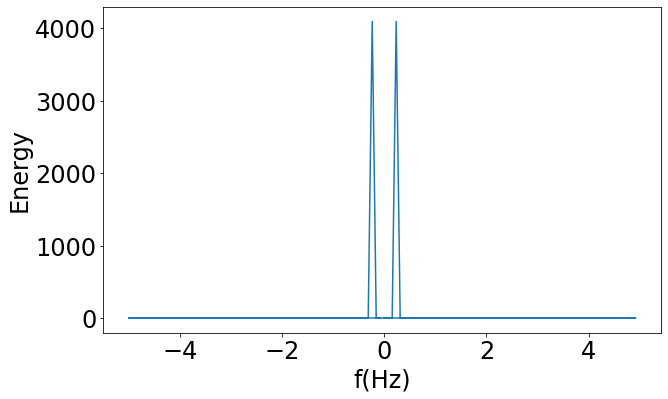

In [31]:
N = 128
T = 12.8
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

freq = 1 / 4.3 # 周期4.3s， 频率0.23

y = np.sin(2 * np.pi * freq * t)
Y = np.fft.fft(y)

freqs = np.fft.fftfreq(n=N, d=T/N)
curve_plot(freqs, np.abs(Y)**2, figsize=(10,6), xlabel='f(Hz)', ylabel='Energy')

而如果`y`函数本身包含了一些其他频率的模

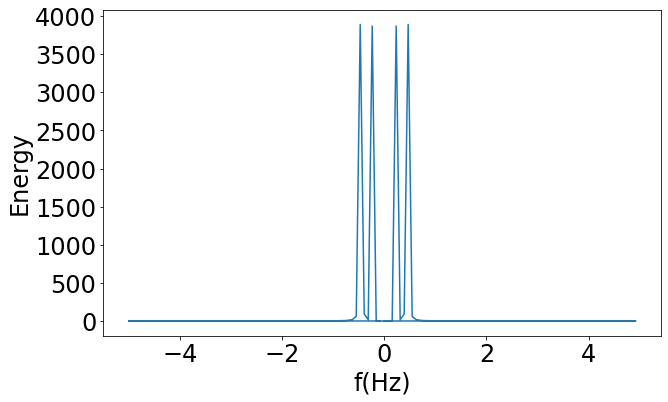

In [32]:
N = 128
T = 12.8
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

freq1 = 1 / 4.3 # 周期4.3s， 频率0.23
freq2 = 1 / 2.2 # 周期4.3s， 频率0.23

y = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)
Y = np.fft.fft(y)

freqs = np.fft.fftfreq(n=N, d=T/N)
curve_plot(freqs, np.abs(Y)**2, figsize=(10,6), xlabel='f(Hz)', ylabel='Energy')

功率谱自然会存在其他的尖峰。

#### 例3 Nyquist频率

我们对函数$y$进行离散化的方式$y(t=n \Delta t) $，其实对应了一个采样（sampling）操作，而采样间隔即为$\Delta t$。

DFT的特点也指出了，这种离散化方式所对应的$DFT$，是无法包含任何频率大于奈奎斯特频率的信息的。而又由于DFT的完备性（DFT包含了原始序列的全部信息），那么原始的采样序列也无法准确采样这些高频的信息！

让我们来通过一个例子，看一下采样频率不足时会发生什么

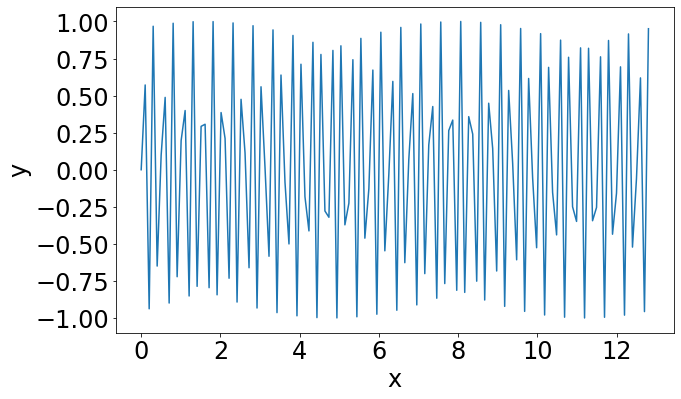

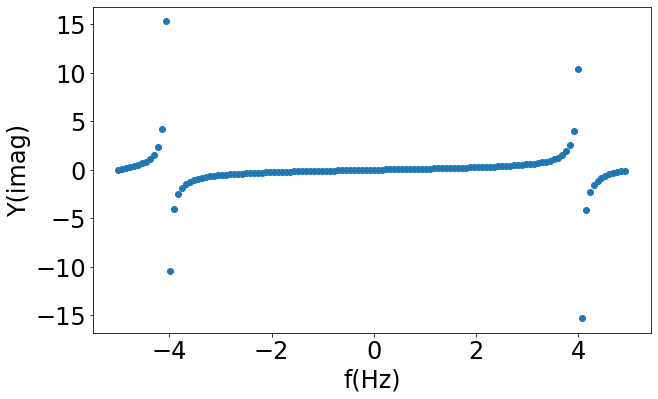

In [33]:
N = 128

T = 12.8
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

# 我们大幅度提高频率到4Hz， 而 dt 对应的Nyquist频率仅为 1 / (T / N) / 2 = 5 Hz
freq = 4 # 频率4

y = np.sin(2 * np.pi * freq * t) 

curve_plot(t, y, figsize=(10,6))

Y = np.fft.fft(y)

freqs = np.fft.fftfreq(n=N, d=T/N)
curve_plot(freqs, Y.imag, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(imag)')

从DFT的虚部结果可以看出，虽然有些勉强，但DFT还是基本上在$4 Hz$时有非0的值。

如果我们进一步提高频率到$7Hz$，而奈奎斯特频率还依然是$5Hz$,让我们来看看结果：


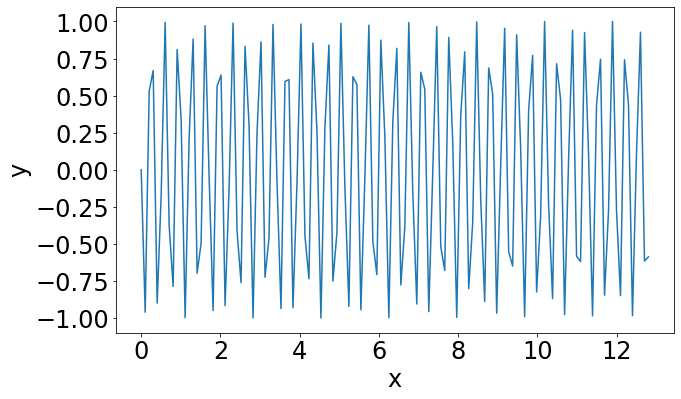

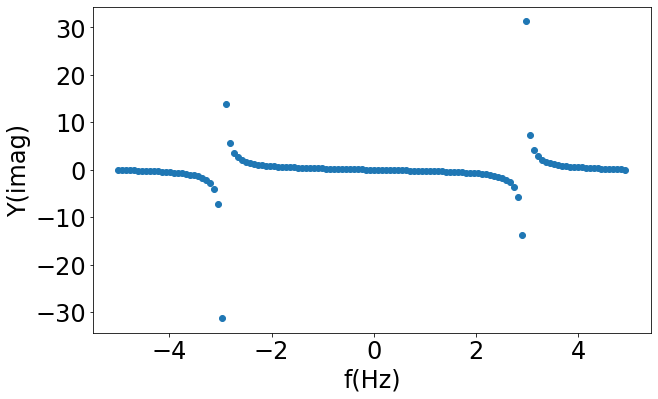

In [34]:
N = 128

T = 12.8
# 从t=0到t=T分成128个格点
t = np.linspace(0, T, N)

# 我们大幅度提高频率到6Hz， 而 dt 对应的Nyquist频率仅为 1 / (T / N) / 2 = 5 Hz
freq = 7 # 频率6

y = np.sin(2 * np.pi * freq * t) 

curve_plot(t, y, figsize=(10,6))

Y = np.fft.fft(y)

freqs = np.fft.fftfreq(n=N, d=T/N)
curve_plot(freqs, Y.imag, scatter=True, figsize=(10,6), xlabel='f(Hz)', ylabel='Y(imag)')

我们会发现，这时DFT无法再反映正确的频率结果。

## 6.3 谱方法求解波动方程（spectral method）

对于傅立叶变换，有这样一个重要性质(让我们暂时把$t$替换成$x$，这时对应的角频率$\omega$也需要被理解成空间的“角频率”，即波数$k$)，：

$$
f(x) = \frac{1}{2\pi} \int F(k) e^{j k x} dk
$$

有

$$
\frac{d f(x)}{dx} = \frac{1}{2\pi} \int  j k F(k) e^{jkx} dk .
$$
即 $\frac{d f(x)}{dx}$的傅立叶变换，等于 $j k F(k)$。

类似的，二阶导数$\frac{d^2 f(x)}{dx^2}$的傅立叶变换，等于$(jk)^2 F(k) = - k^2 F(k)$。对于偏导数，类似的结果依然成立。

那么，让我们再考虑到波动方程：

$$
\frac{\partial^2 y }{\partial t^2} = v^2 \frac{\partial^2 y}{\partial x^2}
$$

让我们定义新的函数$Y(t, k)$，让波动方程的解$y(t, x)$满足

$$
y(t, x) = \frac{1}{2\pi} \int Y(t, k) e^{j k x} dk
$$

那么，波动方程可以被化简为

$$
\int \frac{d^2 Y(t, k)}{dt^2} e^{j k x} dk = v^2 \int -k^2 Y(t, k) e^{j k x} dk
$$

假设傅立叶变换满足唯一性，我们可以得到$Y(t, k)$满足的微分方程：
$$
\frac{d^2 Y(t, k)}{dt^2} = -v^2 k^2 Y(t, k)
$$
而这个在傅立叶空间的方程，跟原始的波动方程最大的区别，便是其是一个常微分方程！

具体的说，对于每一个不同的波数$k$，其随着时间的演化都于其他不同的$k$无关！


而对于这样的简单常微分方程，我们甚至可以写出通解的形式：
$$
Y(t, k) = Y(0, k) e^{-jkv t} + Y(0, k) e^{jkv t}
$$

这样的结果意味着，对于来自于初始条件$y(0, x)$的具有不同$k$的初始的傅立叶“模(mode)” $Y(0,k)$，他们可以独立的沿着时间演化。

这与$y(0, x)$的演化有明显的不同，$y(0,x)$随时间的演化不仅依赖于$y(0,x)$本身，同时也依赖着其导数，也就是依赖于其邻居$y(0,x\pm\delta x)$。

同时，参数$k v=2\pi k_n v / L = 2\pi k_n f_1$也给出了时间演化时的频率：即，如果以波速$v$从绳子的一端走到另一端的时间$T$的倒数对应的频率$f_1$为基础频率，那么时间演化的频率即为$f_1$的整数倍！


#### 使用谱方法求解波动方程

In [344]:
def prop_waves_spec(y0, y1, L, v, t):
    N = len(y0)
    dx = L / N

    #计算Y(0, k)
    Y0 = np.fft.fft(y0)
    #计算k
    ks = np.fft.fftfreq(n=N, d=L / N) * (2 * np.pi) 
    #反变换计算y(t,x)
    yt = np.fft.ifft(Y0 * np.exp(-1j * ks * v * t) / 2 + Y0 * np.exp(1j * ks * v * t) / 2)

    return yt.real
    

下面，让我们尝试用谱方法，来求解波动方程。

为了方便演示，我们这里把初始的波包放在绳子的0.2处（总长度为1)。

In [341]:
# 创造在x轴上的格点
xs = np.linspace(0, 1, 1000)

y0 = np.exp(-1000 * (xs - 0.2)**2)

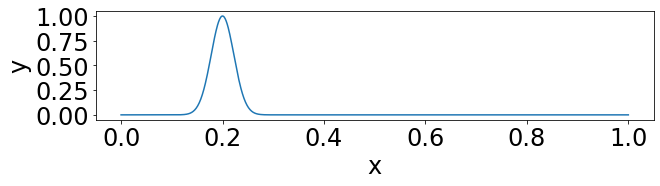

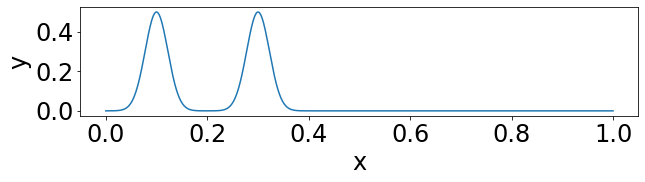

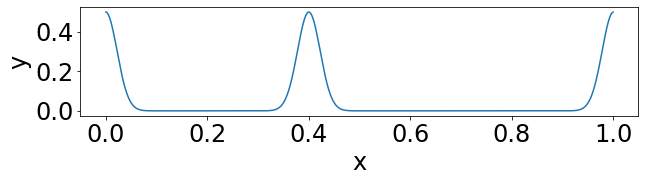

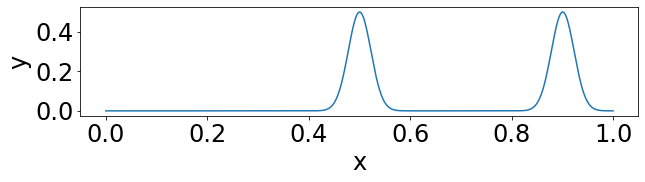

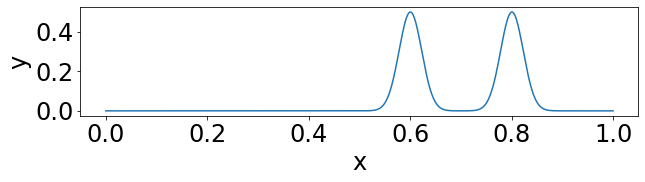

CPU times: user 575 ms, sys: 17.4 ms, total: 592 ms
Wall time: 209 ms


In [342]:
%%time
dx = 1 / len(xs)
dt = dx / 300 # 对应r=1
curve_plot(xs, prop_waves_spec(y0, y0, L=1, v=300, t=0))
curve_plot(xs, prop_waves_spec(y0, y0, L=1, v=300, t=100 * dt))
curve_plot(xs, prop_waves_spec(y0, y0, L=1, v=300, t=200 * dt))
curve_plot(xs, prop_waves_spec(y0, y0, L=1, v=300, t=300 * dt))
curve_plot(xs, prop_waves_spec(y0, y0, L=1, v=300, t=400 * dt))

对比传统的波动方程的递推解题法，我们会发现使用谱方法会计算的快的多！

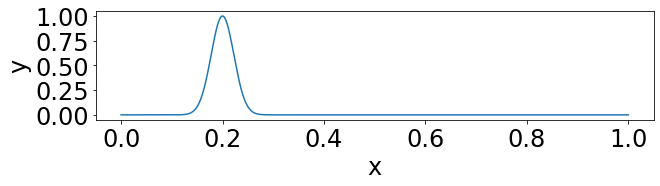

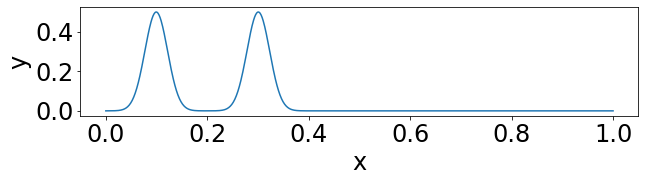

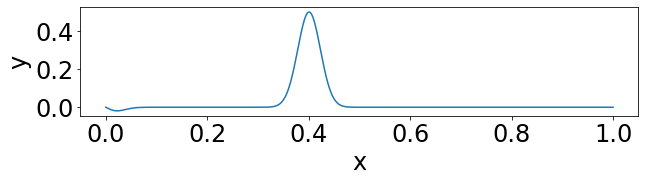

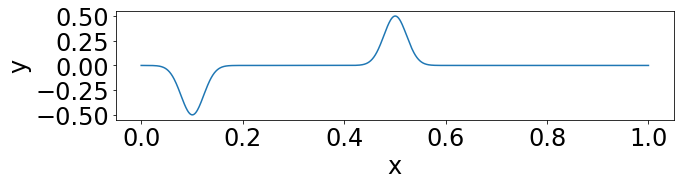

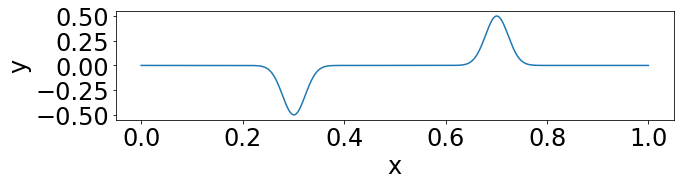

CPU times: user 2.45 s, sys: 18.3 ms, total: 2.47 s
Wall time: 887 ms


In [340]:
%%time
curve_plot(xs, prop_waves(y0, y0, 1, 1))
curve_plot(xs, prop_waves(y0, y0, 1, 100))
curve_plot(xs, prop_waves(y0, y0, 1, 200))
curve_plot(xs, prop_waves(y0, y0, 1, 300))
curve_plot(xs, prop_waves(y0, y0, 1, 500))

然而，对比直接求解波动方程得到的结果，我们会发现一个问题。

在波包传递到边界上之前，两种方法给出同样的结果。但显然，在边界上，通过谱方法求解出的结果，貌似从左边边界出来的波包，直接从右边边界出来了！

这是离散傅立叶变换所具有的特殊性质。任何使用DFT所做的计算，等于额外施加了一个**周期性边界条件**。（参考DFT的定义，思考一下为什么）

那么，如果我们想要用谱方法来施加这种两端固定的边界条件，从而让波包在边界上反射，我们该如何实现呢？

In [343]:
def prop_waves_spec_bd_fixed(y0, y1, L, v, t):
    N = len(y0)
    dx = L / N

    #计算Y(0, k)
    Y0 = np.fft.fft(np.concatenate([y0 , np.zeros(N)])) 
    #计算k
    ks = np.fft.fftfreq(n=N*2, d=L / N) * (2 * np.pi) 
    tmpY = Y0 * np.exp(-1j * ks * v * t)  + Y0 * np.exp(1j * ks * v * t) 
    tmpY.real = 0
    #反变换计算y(t,x)
    yt = np.fft.ifft(tmpY)

    return yt[:N].real
    

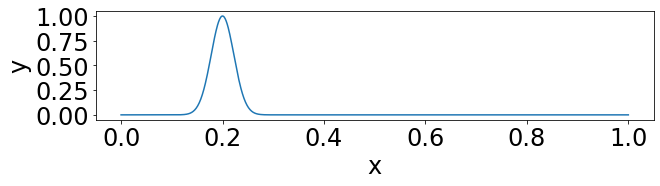

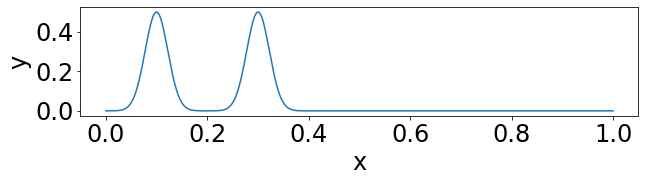

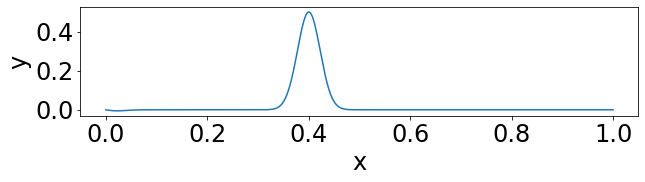

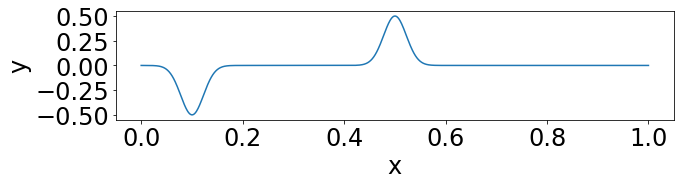

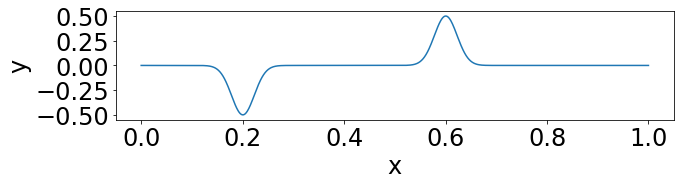

CPU times: user 586 ms, sys: 6.09 ms, total: 592 ms
Wall time: 207 ms


In [339]:
%%time
dx = 1 / len(xs)
dt = dx / 300 # 对应r=1
curve_plot(xs, prop_waves_spec_bd_fixed(y0, y0, L=1, v=300, t=0))
curve_plot(xs, prop_waves_spec_bd_fixed(y0, y0, L=1, v=300, t=100 * dt))
curve_plot(xs, prop_waves_spec_bd_fixed(y0, y0, L=1, v=300, t=200 * dt))
curve_plot(xs, prop_waves_spec_bd_fixed(y0, y0, L=1, v=300, t=300 * dt))
curve_plot(xs, prop_waves_spec_bd_fixed(y0, y0, L=1, v=300, t=400 * dt))

#### 为何只包含奇数倍的基频分量？

下面我们终于可以解释之前的波的分解问题。让我们再回忆一下驻波的振动方式。我们会发现，基频，以及以基频的**奇数倍**为频率震荡的这些模式，他们看起来都是关于以弦中心为轴的**偶函数**。

而基频的偶数倍，往往形状是**奇函数**。

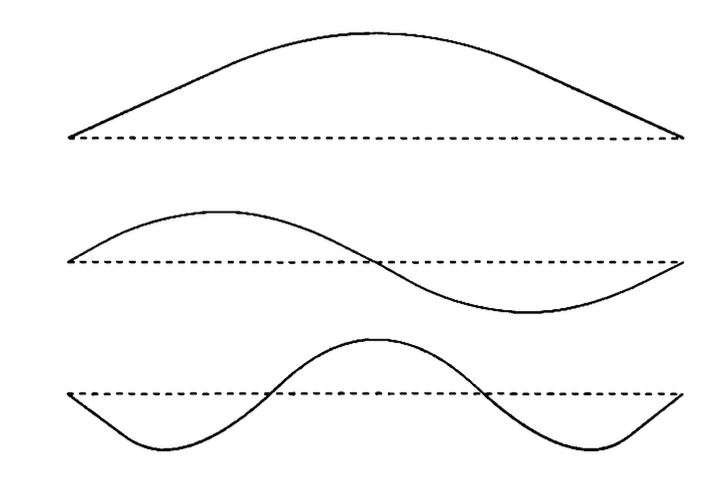

再回忆一下，我们激发弦振动的初始振动的形状

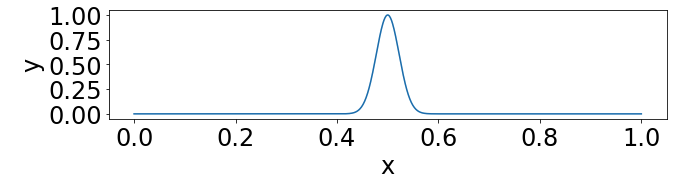

也是一个偶函数。这意味着这个组成这个函数的各个傅立叶振动模，将只有偶函数的成分。即傅立叶分解中所有的`sin`项的傅立叶级数为0。

或者，从对一个偶函数的傅立叶变换也可以看出：

$$
F(\omega) = \int_{-\infty}^{+\infty} f(t) e^{-j\omega t} dt
$$
当$f(t)$为实数且为偶函数时，$F(-\omega) = \int_{-\infty}^{+\infty} f(t) e^{j\omega t} dt = \int_{+\infty}^{-\infty} f(-t) e^{-j\omega t} d (-t) = \int_{-\infty}^{+\infty} f(t) e^{-j\omega t} d t = F(\omega)$。

即：$F(\omega)$也是偶函数。

所以，初始时扰动$y(0, x)$为偶函数，意味着$y(0,k)$只包含偶函数的分量，那么自然，作为$Y(0,k)$反变换之后跟着一个平移的$y(t, x_0)$，也同样只包含偶分量。

为了验证我们的想法，我们可以把初始的扰动稍稍平移，使其非奇非偶（即奇又偶）。

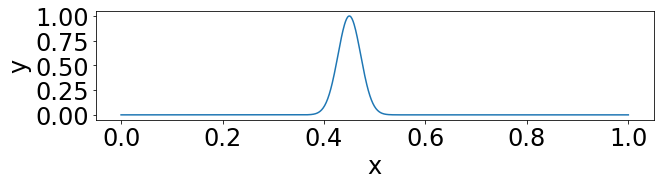

In [358]:
# 创造在x轴上的格点
xs = np.linspace(0, 1, 1000)

y0 = np.exp(-1000 * (xs - 0.45)**2)

curve_plot(xs, y0)


In [359]:
ys, vb = prop_waves_v2(y0, y0, r=1, n=10000,sn=50)

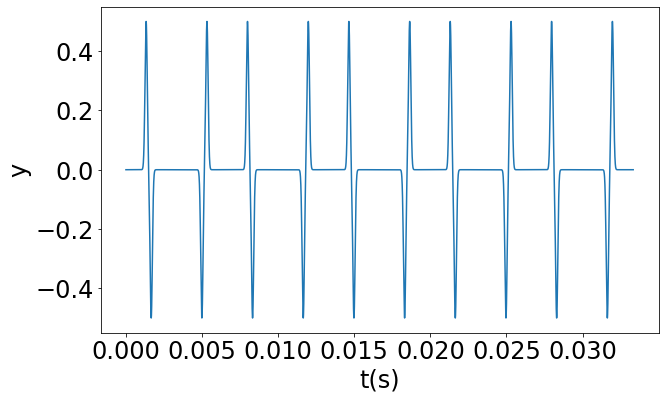

In [360]:
curve_plot(np.arange(10000) * 0.001/300, vb, figsize=(10,6), xlabel='t(s)', ylabel='y')

好像还是看不出有太多区别，让我们使用谱分析。

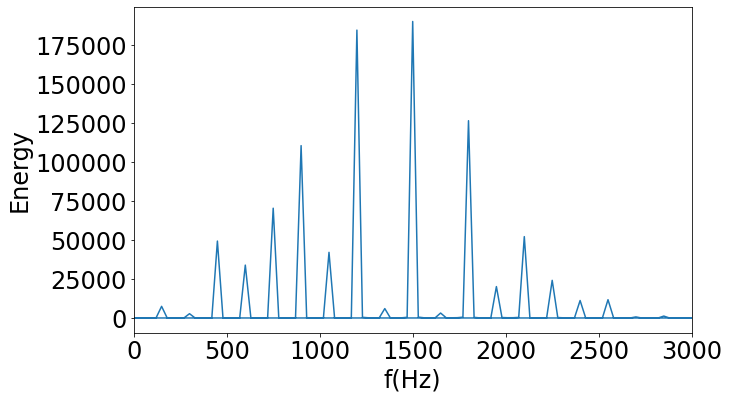

In [361]:
V = np.fft.fft(vb)
PV2 = np.abs(V)**2
freqs = np.fft.fftfreq(n=10000, d=0.001/300)
curve_plot(freqs, PV2, figsize=(10,6), xlabel='f(Hz)', ylabel='Energy', xlim=[0,3000])

In [364]:
freqs[PV2 > 1000]

array([  150.,   300.,   450.,   600.,   750.,   900.,  1050.,  1200.,
        1350.,  1500.,  1650.,  1800.,  1950.,  2100.,  2250.,  2400.,
        2550.,  2850.,  3450.,  3600.,  3750.,  3900.,  4050.,  4200.,
        4500.,  4800., -4800., -4500., -4200., -4050., -3900., -3750.,
       -3600., -3450., -2850., -2550., -2400., -2250., -2100., -1950.,
       -1800., -1650., -1500., -1350., -1200., -1050.,  -900.,  -750.,
        -600.,  -450.,  -300.,  -150.])

把之前的结果（蓝线），和初始波包平移之后的结果（橙线）相比较，会更容易比较。

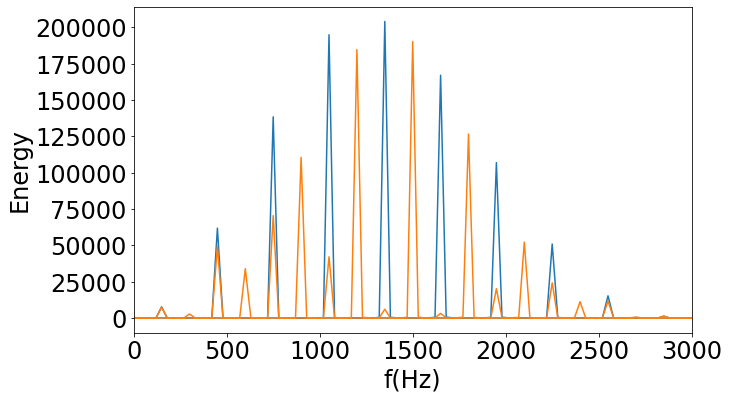

In [365]:
curve_plot([freqs,freqs], [PV, PV2], figsize=(10,6), xlabel='f(Hz)', ylabel='Energy', xlim=[0,3000])

现在，我们的振动包含全部的基频了！

(attachment:99627849-9c45-4776-81ed-dd5efae960ff.png)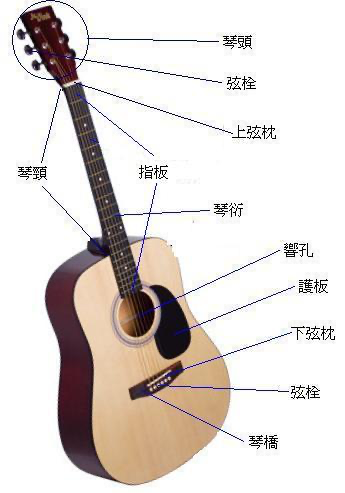
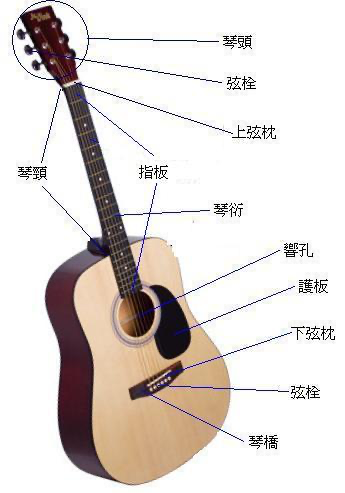